### 1. Load Dataset

In [1]:
import json
with open ('coffee_product_reviews.json') as f:
    reviews = json.load(f)

### 2.Analyze the dataset


In [2]:
print("Information about Cofee Review dataset")
print("Type:", type(reviews))
print("Length:", len(reviews))
print()
print("Information about Cofee Review dataset[0]:")
print("Type:", type(reviews[0]))
print("Length:", len(reviews[0]))
print("Keys:", reviews[0].keys())
print("Values:", reviews[1].values())

Information about Cofee Review dataset
Type: <class 'list'>
Length: 86

Information about Cofee Review dataset[0]:
Type: <class 'dict'>
Length: 7
Keys: dict_keys(['rating', 'reviewer_name', 'product_id', 'review_title', 'review_time', 'images', 'styles'])
Values: dict_values([5.0, 'Maverick', 'B00004RFRV', 'Delicious results from a wonderfully simple Bialetti Moka Express!', '12 3, 2017', ['https://images-na.ssl-images-amazon.com/images/I/61NG30sWdJL._SY88.jpg'], {'Size:': ' 1-Cup', 'Color:': ' Silver'}])


### 3. a)Count of Positive, Negative, and Neutral Reviews

In [3]:
#create a function to show if review is positive or negative
'''
write that code as a function review_sentiment, which takes in a ***review dictionary as an argument***, and returns the string "positive", "negative", or "neutral"

Positive: rating value of 4 or 5 (out of 5)
Neutral: rating value of 3 (out of 5)
Negative: rating value of 1 or 2 (out of 5)
'''

def review_sentiment(review):
    selected_review =  review['rating']
    #print(rating) #checks whether i get the rating
    if selected_review>=4:
        return('positive')
    elif selected_review>=3:
        return('neutral')
    else:
        return('negative')


In [4]:
review_sentiment(reviews[2]) # 'positive'

'positive'

In [5]:
review_sentiment(reviews[4]) # 'negative'

'negative'

In [6]:
review_sentiment(reviews[47]) # 'neutral'

'neutral'

#### b)write a function to loop over **all of the reviews in the list**, and count how many are positive, negative, and neutral.

In [7]:
#initialize an empty dictionary
sentiment_count = {
    'positive':0,
    'negative':0,
    'neutral':0
}

def get_sentiment_counts(review_list):
    for review in review_list:
        #print(review) # To see the reviews
        #call function review_sentiment which highlights if positive,negative or neutral
        rating = review_sentiment(review)
        #print(rating) #- wants to see if getting correct rating
        #Add to dictionary
        sentiment_count[rating]+=1
    return sentiment_count
get_sentiment_counts(reviews)

{'positive': 67, 'negative': 15, 'neutral': 4}

### 4. List of Years Contained in the Dataset

In [8]:
'''
write that code as a function review_year, which takes in a ***review*** dictionary as an argument, and returns the year as an integer
'''
def review_year(review):
    year =  review['review_time']
    #print(year) #print to see whther the i get the correct output
    year = int(year[-4:]) #slice to get the years which is the last 4 words
    return year

review_year(reviews[0])

2018

In [9]:
#tes code
review_year(reviews[2]) # 2017

2017

In [10]:
review_year(reviews[4]) # 2017

2017

In [11]:
review_year(reviews[47]) # 2015

2015

### 5.write a function called get_years to loop over **all of the reviews in the review list** and create a list of the years you find. 
#### Each year should only appear once, in ascending order. The function should accept one argument (review_list) and should return a list of integers representing the years

In [12]:
def get_years(review_list):
    review_years=[] #initialize empty list to add years
    for review in review_list:
        years = review_year(review) #passed in the function review_year from above that gets the years
        #Add year to the list
        review_years.append(years)
        #Get unique years by using set function and converting back to a list
    review_years = list(set(review_years))
    review_years.sort()
    return review_years
print(get_years(reviews)) # [2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
print(type(get_years(reviews))) # <class 'list'>

[2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
<class 'list'>


In [13]:
# formula 2
def get_years(review_list):
    review_years=[] #initialize empty list to add years
    for review in review_list:
        years = review_year(review) #passed in the function review_year from above that gets the years
        #Add year not already in the list to the list 
        if years not in review_years:
            review_years.append(years)
    review_years.sort()
    return review_years
print(get_years(reviews)) # [2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
print(type(get_years(reviews))) # <class 'list'>
#Now we know that we have data spanning 2007-2018, with no data from 2010

[2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
<class 'list'>


### 6.Subset Sampling 
#### Once you have an overall sense of a dataset, it's a good idea to ask what are some examples of records in each category? For example, what are some examples of a negative review?

##### a)create a function `is_negative` that takes in a **review dictionary** as an argument and returns `True` if the review is negative, `False` otherwise:

In [14]:
def is_negative(review):
    review_rating = review_sentiment(review) #use function review_sentiment create above to get negative,positive and neutral reviews
    #print(review_rating) #- check a review
    return review_rating =='negative'

print(is_negative(reviews[2]))  # False (postive review)
print(is_negative(reviews[4]))  # True
print(is_negative(reviews[47])) # False (neutral review)

False
True
False


##### b)Write a function called get_negative_reviews that returns a list of these reviews. It should take the **list of all reviews as an argument**

In [15]:
def get_negative_reviews(review_list):
        return list(filter(is_negative,review_list))
print(len(get_negative_reviews(reviews)))
get_negative_reviews(reviews)

15


[{'rating': 1.0,
  'reviewer_name': 'EJ',
  'product_id': 'B00004RFRV',
  'review_title': 'Rusted spots everywhere fresh out the box...nasty',
  'review_time': '06 4, 2017',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71Dbr6X0bYL._SY88.jpg'],
  'styles': {'Size:': ' 9-Cup', 'Color:': ' Silver'}},
 {'rating': 1.0,
  'reviewer_name': 'mathman54',
  'product_id': 'B00004RFRV',
  'review_title': "The bottom looks like it has rusted and I don't know how to ...",
  'review_time': '02 15, 2016',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71qt4Hnra8L._SY88.jpg',
   'https://images-na.ssl-images-amazon.com/images/I/71Wkg8MesdL._SY88.jpg'],
  'styles': {'Size:': ' 12-Cup', 'Color:': ' Silver'}},
 {'rating': 1.0,
  'reviewer_name': 'Maria Fernandez',
  'product_id': 'B00004RFRV',
  'review_title': 'Is it a Bialetti? Came dirty with coffee grounds.',
  'review_time': '03 22, 2015',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71aPg3ZuCzL._SY

##### c)Sampling
##### We'll use the random.sample() function, which takes in a collection and a number, and returns that number of elements from the collection.
##### Write a function get_negative_review_sample. This function should take a **list of reviews and the number of samples** to select, and should return a sample of negative reviews

In [16]:
import random
def get_negative_review_sample(review_list,num_samples):
    return random.sample(get_negative_reviews(review_list),num_samples)

get_negative_review_sample(reviews,2)

[{'rating': 1.0,
  'reviewer_name': 'EJ',
  'product_id': 'B00004RFRV',
  'review_title': 'Rusted spots everywhere fresh out the box...nasty',
  'review_time': '06 4, 2017',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71Dbr6X0bYL._SY88.jpg'],
  'styles': {'Size:': ' 9-Cup', 'Color:': ' Silver'}},
 {'rating': 2.0,
  'reviewer_name': 'LMM',
  'product_id': 'B00008ELEA',
  'review_title': 'smelled like the cord was burning',
  'review_time': '06 6, 2016',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/51xXENQhIGL._SY88.jpg'],
  'styles': {'Size:': ' 4-Cup'}}]

#### 7.Repeat the same process for positive reviews. That means we need:
##### A helper function is_positive (this can't just be not is_negative since neutral reviews are neither)
##### A function get_positive_reviews which returns a list of all positive reviews
##### A function get_positive_review_sample which returns a sample of positive reviews with the specified length

In [17]:
import random
def is_positive(review):
    review_rating = review_sentiment(review)
    return review_rating=='positive'


#is_positive(reviews[0]) #test if it return positive

def get_positive_review(review_list):
    return list(filter(is_positive,review_list))
#print(len(get_negative_reviews(reviews)))
#get_positive_review(reviews) # test if this functions works

def get_positive_review_sample(review_list,num_sample):
    return random.sample(get_positive_review(review_list),num_sample)

get_positive_review_sample(get_positive_review(reviews),4)

[{'rating': 5.0,
  'reviewer_name': 'dvrmasik',
  'product_id': 'B00005NCWQ',
  'review_title': 'rich and aromatic coffee',
  'review_time': '05 5, 2016',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/81fgcTsXRwL._SY88.jpg',
   'https://images-na.ssl-images-amazon.com/images/I/81bsfG7k7kL._SY88.jpg'],
  'styles': {'Size:': ' 8-Cup'}},
 {'rating': 5.0,
  'reviewer_name': 'Jonathan Sabin',
  'product_id': 'B00004RFRV',
  'review_title': 'Smooo---ooo----oooo--th!!',
  'review_time': '10 2, 2007',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/51XtijrZHBL._SY88.jpg'],
  'styles': {'Size:': ' 6-Cup', 'Color:': ' Silver'}},
 {'rating': 4.0,
  'reviewer_name': 'Homer',
  'product_id': 'B0000CFFS6',
  'review_title': 'Works great once you figure out how to take it off',
  'review_time': '01 2, 2016',
  'images': ['https://images-na.ssl-images-amazon.com/images/I/71l3LH-AH4L._SY88.jpg'],
  'styles': {'Style Name:': ' Regular Mouth'}},
 {'rating': 5.0,
  'reviewe

### 8. Individual Review Summary
####  Write a function called get_review_summary, which takes a **review dictionary** as an argument, and returns a string that resembles
##### "Bialetti is the Best!": This was a positive review written by Karen in 2017.
 from reviews[2]

###### {'rating': 5.0,
###### 'reviewer_name': 'Karen',
###### 'product_id': 'B00004RFRV',
###### 'review_title': 'Bialetti is the Best!',
###### 'review_time': '11 12, 2017',
###### 'images': ['https://images-na.ssl-images-amazon.com/images/I/81+XxFRGyBL._SY88.jpg'],
###### 'styles': {'Size:': ' 12-Cup', 'Color:': ' Silver'}}

In [18]:
reviews[2]

{'rating': 5.0,
 'reviewer_name': 'Karen',
 'product_id': 'B00004RFRV',
 'review_title': 'Bialetti is the Best!',
 'review_time': '11 12, 2017',
 'images': ['https://images-na.ssl-images-amazon.com/images/I/81+XxFRGyBL._SY88.jpg'],
 'styles': {'Size:': ' 12-Cup', 'Color:': ' Silver'}}

In [19]:
def get_review_summary(review):
    selected_title = review['review_title']
    #print(selected_title) #test title
    rating = review_sentiment(review) #use review_sentiment function above that prints positive,negative or neutral
    #print(rating) #test review
    selected_author = review['reviewer_name']
    #print(selected_author)
    selected_year = review_year(review) #use review_year function above to get year
    #print(selected_year)
    #combine all
    summary = print(f'"{selected_title}": This was a {rating} review written by {selected_author} in {selected_year}.')
    return summary

In [20]:
get_review_summary(reviews[2])

"Bialetti is the Best!": This was a positive review written by Karen in 2017.


    ### BONUS:  `'ADDING IMAGES'`

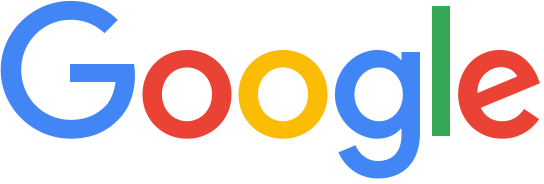

In [21]:
#Example
from IPython.display import Image
Image('https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png')

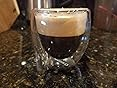

In [25]:
#using our cofeee dataset
Image(reviews[0]['images'][0])